## **Inspect Model(s)**

### **Imports**

In [15]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys

ROOT_DIR = os.path.abspath("../")
print('Root directory:',ROOT_DIR)

sys.path.append(ROOT_DIR)
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline 

LOGS_DIR = os.path.join(ROOT_DIR, "logs", "inspect")

if not os.path.exists(LOGS_DIR):
    os.makedirs(LOGS_DIR)
    print(f"Folder '{LOGS_DIR}' created.")

Root directory: c:\Users\abell\Documents\aa_delft\J4\BEP\ai


In [16]:
%load_ext autoreload
%autoreload 2
import bep_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Configurations**

In [17]:
import tdmcoco
config = tdmcoco.CocoConfig()

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 3  # thin, few, thick
    DETECTION_MIN_CONFIDENCE = 0.7
    USE_MINI_MASK = False
config = InferenceConfig()
# config.display()

### **Load data**

In [18]:
bep_utils.check_dir_setup(ROOT_DIR, (0.8, 0.1, 0.1))

# _, bep_val, _ = bep_utils.load_train_val_datasets(ROOT_DIR)

from bep_data_class import bepDataset
bep_val = bepDataset()
bep_val.load_dir(os.path.join(ROOT_DIR, 'data'), 'batch3', reload_annotations=True)
bep_val.prepare()

print("BEP NbSe2 images: {} | Classes: {}".format(len(bep_val.image_ids),bep_val.class_names))

Directory setup correctly
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
BEP NbSe2 images: 7 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']


### **Load Model**

In [19]:
BEP_MODEL_PATH = os.path.join(ROOT_DIR, 'saved_weights', 'tdm20241016T2359', 'mask_rcnn_tdm_0111.h5')
model_NbSe2 = modellib.MaskRCNN(mode="inference", model_dir=LOGS_DIR, config=config, name='NbSe2 Fine-tuned Model')
print("NbSe2 Model, loading weights {}".format(BEP_MODEL_PATH))
model_NbSe2.load_weights(BEP_MODEL_PATH, by_name=True)

NbSe2 Model, loading weights c:\Users\abell\Documents\aa_delft\J4\BEP\ai\saved_weights\tdm20241016T2359\mask_rcnn_tdm_0111.h5
Re-starting from epoch 111


### **Run Model**

In [20]:
run_model = bep_utils.runModel(model_NbSe2, config)

image ID: ali.4 (3) 
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  225.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  101.30000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


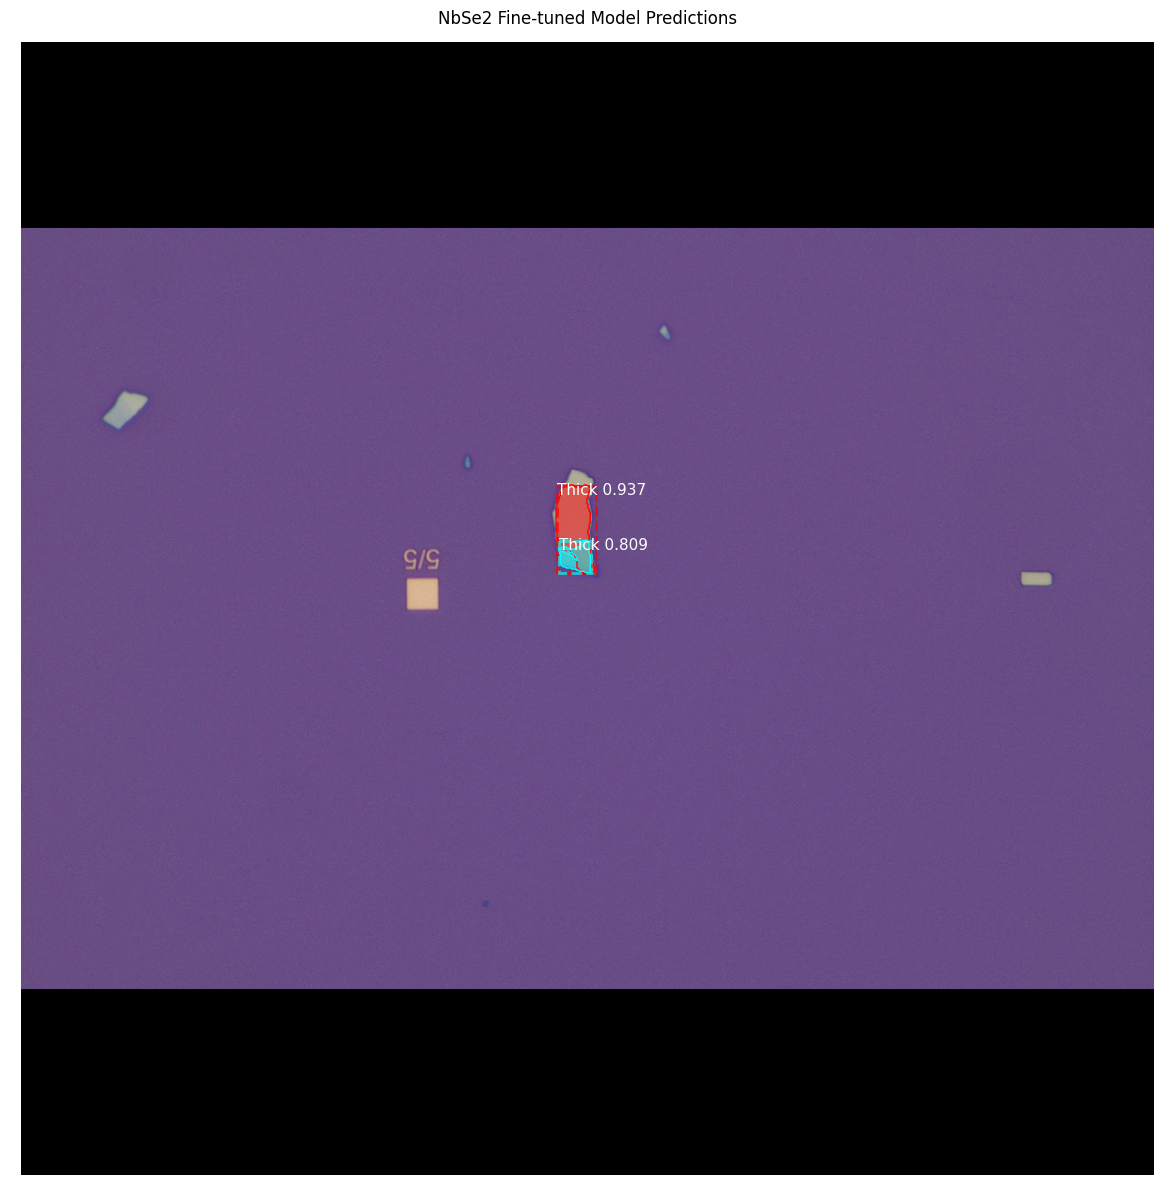

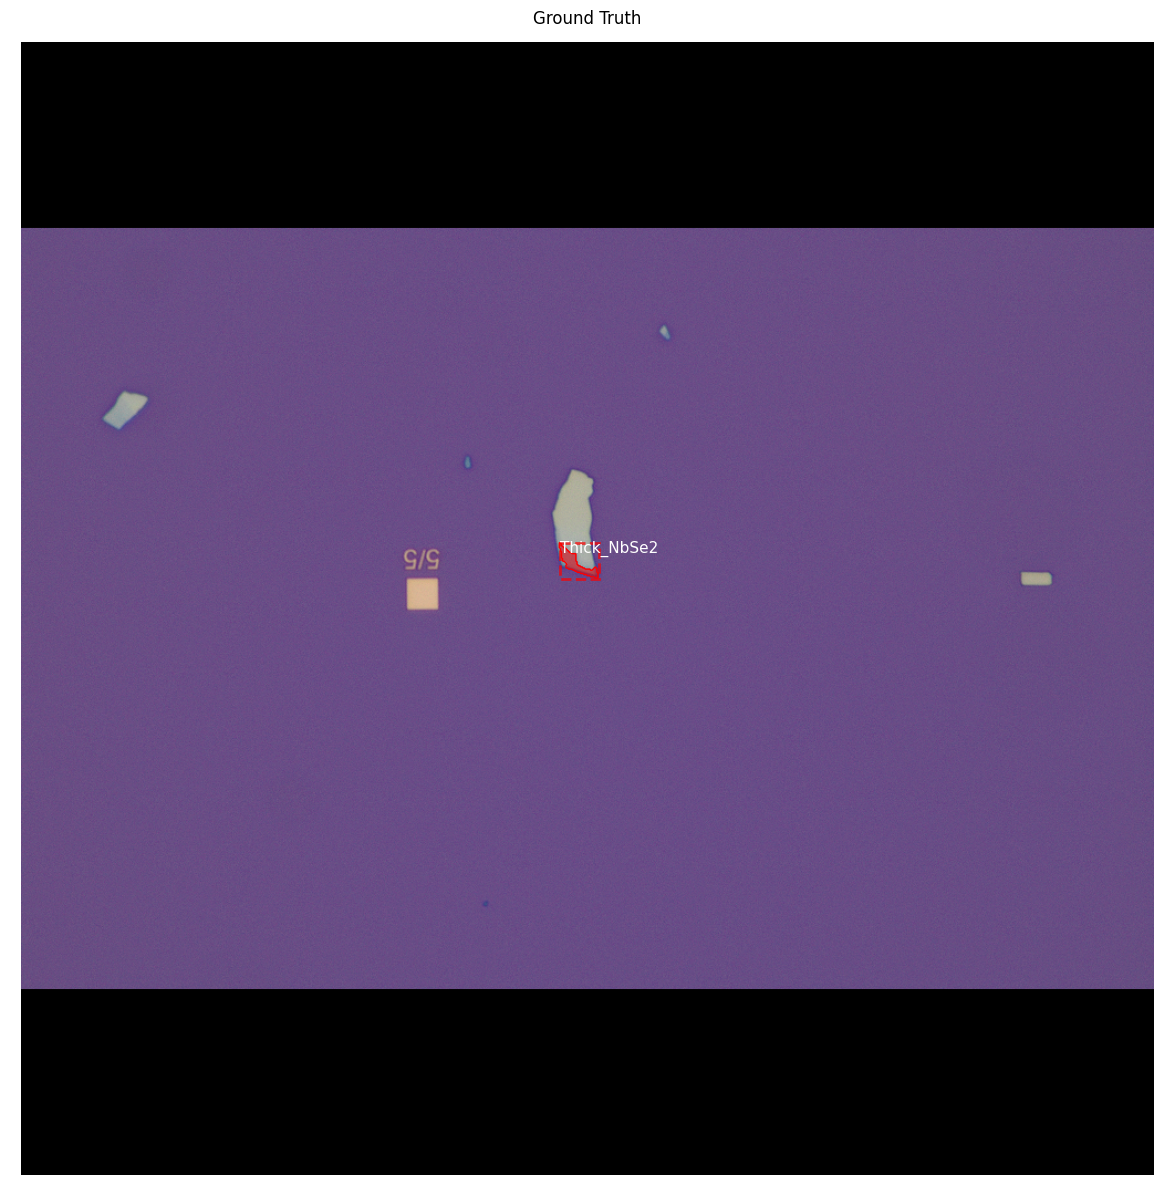

In [21]:
run_model.run(image_idx=3, dataset=bep_val)
run_model.gt()